In [1]:
import pandas as pd
import sqlite3

In [1]:
import os
os.getcwd()

'C:\\Users\\user\\AppData\\Local\\Programs\\Python\\Python312\\Scripts'

In [2]:
#creating database connetion
conn = sqlite3.connect('onlinesales.db')

In [7]:
#checking tables present in the database
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type ='table'",conn)
tables

,name
0,Details
1,Orders
2,Orders_clean


In [8]:

for table in tables['name']:
    print('Table name\t','Count of records',)
    print(f'{table}\t\t',pd.read_sql(f"SELECT count(*) as count FROM {table}",conn)['count'].values[0])
    df = pd.read_sql(f"SELECT * FROM {table} limit 5",conn)
    display(df)
    print(df.dtypes)
    

Table name	 Count of records
Details		 1500


,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,B-25681,1096,658,7,Electronics,Electronic Games,COD
1,B-26055,5729,64,14,Furniture,Chairs,EMI
2,B-25955,2927,146,8,Furniture,Bookcases,EMI
3,B-26093,2847,712,8,Electronics,Printers,Credit Card
4,B-25602,2617,1151,4,Electronics,Phones,Credit Card


Order ID        object
Amount           int64
Profit           int64
Quantity         int64
Category        object
Sub-Category    object
PaymentMode     object
dtype: object
Table name	 Count of records
Orders		 500


,Order ID,Order Date,CustomerName,State,City
0,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura
1,B-25993,03-02-2018,Madhav,Delhi,Delhi
2,B-25973,24-01-2018,Madan Mohan,Uttar Pradesh,Mathura
3,B-25923,27-12-2018,Gopal,Maharashtra,Mumbai
4,B-25757,21-08-2018,Vishakha,Madhya Pradesh,Indore


Order ID        object
Order Date      object
CustomerName    object
State           object
City            object
dtype: object
Table name	 Count of records
Orders_clean		 500


,Order ID,Order Date,CustomerName,State,City
0,B-26055,2018-03-10,Harivansh,Uttar Pradesh,Mathura
1,B-25993,2018-02-03,Madhav,Delhi,Delhi
2,B-25973,2018-01-24,Madan Mohan,Uttar Pradesh,Mathura
3,B-25923,2018-12-27,Gopal,Maharashtra,Mumbai
4,B-25757,2018-08-21,Vishakha,Madhya Pradesh,Indore


Order ID        object
Order Date      object
CustomerName    object
State           object
City            object
dtype: object


In [14]:
print(pd.read_sql("Select * From Orders", conn))

    Order ID  Order Date CustomerName             State     City
0    B-26055  10-03-2018    Harivansh     Uttar Pradesh  Mathura
1    B-25993  03-02-2018       Madhav             Delhi    Delhi
2    B-25973  24-01-2018  Madan Mohan     Uttar Pradesh  Mathura
3    B-25923  27-12-2018        Gopal       Maharashtra   Mumbai
4    B-25757  21-08-2018     Vishakha    Madhya Pradesh   Indore
..       ...         ...          ...               ...      ...
495  B-25742  03-08-2018       Ashwin               Goa      Goa
496  B-26088  26-03-2018       Bhavna            Sikkim  Gangtok
497  B-25707  01-07-2018      Shivani       Maharashtra   Mumbai
498  B-25758  22-08-2018      Shubham  Himachal Pradesh    Simla
499  B-26095  28-03-2018      Monisha         Rajasthan   Jaipur

[500 rows x 5 columns]


In [19]:
#Do not need
# Order Date in object format. It need change to the date format
orders = pd.read_sql('SELECT * FROM "Orders"',conn)
orders["Order Date"] = pd.to_datetime(
    orders["Order Date"],
    dayfirst = True,
    errors = "coerce"
)

,Order ID,Order Date,CustomerName,State,City
0,B-26055,2018-10-03,Harivansh,Uttar Pradesh,Mathura
1,B-25993,2018-03-02,Madhav,Delhi,Delhi
2,B-25973,NaT,Madan Mohan,Uttar Pradesh,Mathura
3,B-25923,NaT,Gopal,Maharashtra,Mumbai
4,B-25757,NaT,Vishakha,Madhya Pradesh,Indore
...,...,...,...,...,...
495,B-25742,2018-03-08,Ashwin,Goa,Goa
496,B-26088,NaT,Bhavna,Sikkim,Gangtok
497,B-25707,2018-01-07,Shivani,Maharashtra,Mumbai
498,B-25758,NaT,Shubham,Himachal Pradesh,Simla


In [15]:
#Do not need
#Update Database with correct date format
orders.to_sql(
    "Orders",conn,
    if_exists = "replace",
    index=False
)
orders["Order Date"] = orders["Order Date"].dt.date

In [16]:
#Do not need
#check
order_check =  pd.read_sql('SELECT * FROM "Orders"',conn)
print(order_check.dtypes)
order_check.head()

Order ID        object
Order Date      object
CustomerName    object
State           object
City            object
dtype: object


,Order ID,Order Date,CustomerName,State,City
0,B-26055,2018-03-10 00:00:00,Harivansh,Uttar Pradesh,Mathura
1,B-25993,2018-02-03 00:00:00,Madhav,Delhi,Delhi
2,B-25973,2018-01-24 00:00:00,Madan Mohan,Uttar Pradesh,Mathura
3,B-25923,2018-12-27 00:00:00,Gopal,Maharashtra,Mumbai
4,B-25757,2018-08-21 00:00:00,Vishakha,Madhya Pradesh,Indore


In [21]:
order_check

,Order ID,Order Date,CustomerName,State,City
0,B-26055,2018-03-10 00:00:00,Harivansh,Uttar Pradesh,Mathura
1,B-25993,2018-02-03 00:00:00,Madhav,Delhi,Delhi
2,B-25973,2018-01-24 00:00:00,Madan Mohan,Uttar Pradesh,Mathura
3,B-25923,2018-12-27 00:00:00,Gopal,Maharashtra,Mumbai
4,B-25757,2018-08-21 00:00:00,Vishakha,Madhya Pradesh,Indore
...,...,...,...,...,...
495,B-25742,2018-08-03 00:00:00,Ashwin,Goa,Goa
496,B-26088,2018-03-26 00:00:00,Bhavna,Sikkim,Gangtok
497,B-25707,2018-07-01 00:00:00,Shivani,Maharashtra,Mumbai
498,B-25758,2018-08-22 00:00:00,Shubham,Himachal Pradesh,Simla


In [22]:
#Check null values
for table in tables['name']:
    df = pd.read_sql(f'SELECT * FROM "{table}"',conn)
    print("\n", table)
    print(df.isnull().sum())


 Details
Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
PaymentMode     0
dtype: int64

 Orders
Order ID        0
Order Date      0
CustomerName    0
State           0
City            0
dtype: int64


In [23]:
#Analysis

tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type ='table'",conn)

In [50]:
#Total amount, profit, quantity, and order count with respect to  product category
Tot_product = """
SELECT Category,
    SUM(Amount) as Total_Amount,
    SUM(Profit) as Total_Profit,
    ROUND((SUM(Profit)*100.0)/NULLIF(SUM(Amount),0),2) AS Profit_Percentage,
    SUM(Quantity) as Total_Quantity,
    COUNT(DISTINCT "Order ID") as Order_Count
FROM Details
GROUP BY Category
ORDER BY Total_Amount DESC, Total_Profit DESC, Total_Quantity DESC, Order_Count DESC 
"""

print(pd.read_sql(Tot_product,conn))

      Category  Total_Amount  Total_Profit  Profit_Percentage  Total_Quantity  \
0  Electronics        166267         13162               7.92            1154   
1     Clothing        144323         13325               9.23            3516   
2    Furniture        127181         10476               8.24             945   

   Order_Count  
0          204  
1          393  
2          186  


In [51]:
#Total amount, profit, quantity and order count with respect to product and product category
Tot_product = """
SELECT Category, "Sub-Category" as Sub_Category,
    SUM(Amount) as Total_Amount,
    SUM(Profit) as Total_Profit,
    ROUND((SUM(Profit)*100.0)/NULLIF(SUM(Amount),0),2) AS Profit_Percentage,
    SUM(Quantity) as Total_Quantity,
    COUNT(DISTINCT "Order ID") as Order_Count
FROM Details
GROUP BY Category, "Sub-Category"
ORDER BY Category, Total_Amount DESC, Total_Profit DESC, Total_Quantity DESC, Order_Count DESC 
"""

print(pd.read_sql(Tot_product,conn))

       Category      Sub_Category  Total_Amount  Total_Profit  \
0      Clothing             Saree         59094          4057   
1      Clothing          Trousers         30039          2847   
2      Clothing             Stole         18546          2431   
3      Clothing       Hankerchief         14294          1823   
4      Clothing             Shirt          7555          1513   
5      Clothing           T-shirt          7382          1500   
6      Clothing             Kurti          3361          -401   
7      Clothing          Leggings          2106          -130   
8      Clothing             Skirt          1946          -315   
9   Electronics          Printers         59252          8606   
10  Electronics            Phones         46119          1847   
11  Electronics  Electronic Games         39168          -644   
12  Electronics       Accessories         21728          3353   
13    Furniture         Bookcases         56861          6516   
14    Furniture          

In [18]:
pd.read_sql("""SELECT  strftime('%m', Orders."Order Date") AS month,
               SUM(Details.Amount) as Total_Amount,
               SUM(Details.Quantity) as Total_Quantity
               FROM Orders
               LEFT JOIN Details ON Orders."Order ID" = Details."Order ID" 
               GROUP BY month
               ORDER BY month""", conn)

,month,Total_Amount,Total_Quantity
0,None,437771,5615


In [10]:
#Change date format
orders = pd.read_sql('SELECT * FROM "Orders"', conn)

orders["Order Date"] = pd.to_datetime(orders["Order Date"], dayfirst=True, errors="coerce")
orders["Order Date"] = orders["Order Date"].dt.strftime("%Y-%m-%d")  # ISO date text



In [11]:
orders.to_sql("Orders_clean", conn, if_exists="replace", index=False)


500

In [16]:
pd.read_sql("""SELECT  strftime('%m', Orders_clean."Order Date") AS month,
               SUM(Details.Amount) as Total_Amount,
               SUM(Details.Quantity) as Total_Quantity,
               ROUND((SUM(Details.Profit)*100.0)/NULLIF(SUM(Details.Amount),0),2) AS Profit_Percentage
               FROM Details 
               LEFT JOIN Orders_clean ON Orders_clean."Order ID" = Details."Order ID" 
               GROUP BY month 
               ORDER BY month""", conn)

,month,Total_Amount,Total_Quantity,Profit_Percentage
0,01,61632,745,15.71
1,02,38962,512,21.73
2,03,60694,751,12.84
3,04,34330,389,12.21
4,05,29093,423,-12.82
5,06,23658,369,1.78
6,07,12966,240,-16.49
7,08,31492,446,6.57
8,09,27283,331,-5.13
9,10,31613,419,9.36


In [21]:
prof_plot = pd.read_sql("""SELECT  strftime('%m', Orders_clean."Order Date") AS month, Details.Category, 
               SUM(Details.Amount) as Total_Amount,
               SUM(Details.Quantity) as Total_Quantity,
               ROUND((SUM(Details.Profit)*100.0)/NULLIF(SUM(Details.Amount),0),2) AS Profit_Percentage
               FROM Details 
               LEFT JOIN Orders_clean ON Orders_clean."Order ID" = Details."Order ID" 
               GROUP BY month, Details.Category
               ORDER BY month""", conn)

prof_plot

,month,Category,Total_Amount,Total_Quantity,Profit_Percentage
0,01,Clothing,13659,436,16.32
1,01,Electronics,26716,164,17.91
2,01,Furniture,21257,145,12.56
3,02,Clothing,10107,312,17.45
4,02,Electronics,12593,82,36.00
5,02,Furniture,16262,118,13.33
6,03,Clothing,22175,516,21.51
7,03,Electronics,21860,141,12.15
8,03,Furniture,16659,94,2.20
9,04,Clothing,15082,251,1.35


In [26]:
pivot_prof_plot = prof_plot.pivot(
    index="month",
    columns="Category",
    values="Profit_Percentage"
)

month_map = {"01":"Jan","02":"Feb","03":"Mar","04":"Apr","05":"May","06":"Jun","07":"Jul",
         "08":"Aug","09":"Sep","10":"Oct","11":"Nov","12":"Dec"}

pivot_prof_plot.index = pivot_prof_plot.index.map(month_map)

pivot_prof_plot

Category,Clothing,Electronics,Furniture
month,,,
Jan,16.32,17.91,12.56
Feb,17.45,36.00,13.33
Mar,21.51,12.15,2.20
Apr,1.35,7.52,38.80
May,-4.10,-19.70,-12.77
Jun,-6.19,6.74,6.04
Jul,-1.61,-25.12,-13.12
Aug,5.07,4.65,10.43
Sep,-13.94,-12.63,12.59


In [29]:
!pip install matplotlib

     ---------------------------------------- 0.0/52.8 kB ? eta -:--:--
     ------- -------------------------------- 10.2/52.8 kB ? eta -:--:--
     -------------- ----------------------- 20.5/52.8 kB 162.5 kB/s eta 0:00:01
     ---------------------- --------------- 30.7/52.8 kB 187.9 kB/s eta 0:00:01
     -------------------------------------- 52.8/52.8 kB 247.6 kB/s eta 0:00:00
     ---------------------------------------- 0.0/116.4 kB ? eta -:--:--
     ------------------------------ -------- 92.2/116.4 kB 1.7 MB/s eta 0:00:01
     -------------------------------------- 116.4/116.4 kB 1.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 14.9 MB/s eta 0:00:01
   -------- ------------------------------- 1.7/8.1 MB 18.5 MB/s eta 0:00:01
   ------------------ --------------------- 3.7/8.1 MB 26.6 MB/s eta 0:00:01
   ------------------------------ --------- 6.2/8.1 MB 33.2 MB/s eta 0:00:01
   --


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


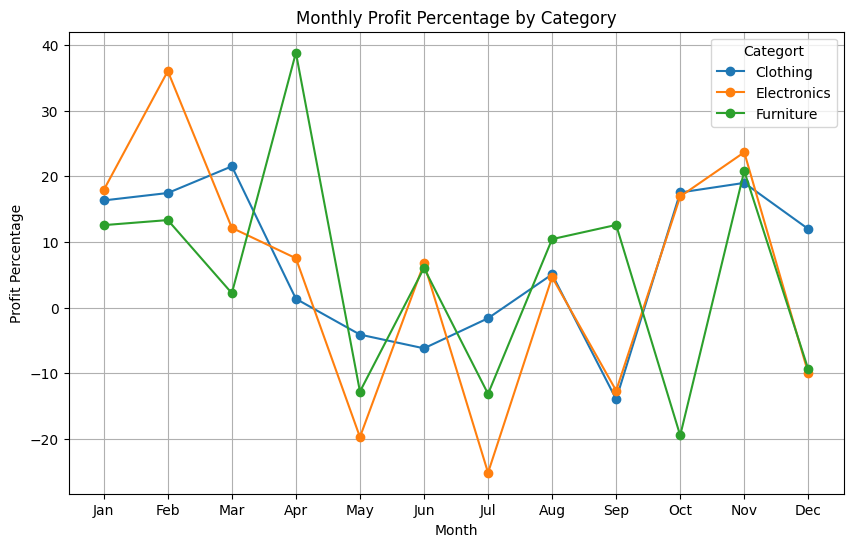

In [33]:
#Profit Plot 
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

for category in pivot_prof_plot.columns:
    plt.plot(
        pivot_prof_plot.index,
        pivot_prof_plot[category],
        marker = 'o',
        label=category
    )

plt.xlabel("Month")
plt.ylabel("Profit Percentage")
plt.title("Monthly Profit Percentage by Category")
plt.legend(title="Categort")
plt.grid(True)

plt.show()

In [39]:
#Total amount, profit, quantity and order count with respect to state  category
pd.read_sql("""
SELECT o.State, 
    SUM(d.Amount) as Total_Amount,
    SUM(d.Profit) as Total_Profit,
    SUM(d.Quantity) as Total_Quantity,
    COUNT(DISTINCT d."Order ID") as Order_Count
FROM  Details d
JOIN  Orders o ON o."Order ID" = d."Order ID" 
GROUP BY State
ORDER BY Total_Amount DESC,  Total_Profit DESC, Total_Quantity DESC, Order_Count DESC 
""",conn)

,State,Total_Amount,Total_Profit,Total_Quantity,Order_Count
0,Maharashtra,102498,6963,1091,94
1,Madhya Pradesh,87463,7382,1227,93
2,Uttar Pradesh,38362,3358,387,25
3,Delhi,22957,1958,290,24
4,Rajasthan,22334,-323,282,32
5,Gujarat,21371,3001,328,27
6,Punjab,16786,1571,216,25
7,West Bengal,14328,2074,216,22
8,Kerala,13871,2435,157,16
9,Bihar,13417,1787,206,16


In [37]:
#Total amount, profit, quantity and order count with respect to state and city category
pd.read_sql("""
SELECT o.State, o.City,
    SUM(d.Amount) as Total_Amount,
    SUM(d.Profit) as Total_Profit,
    SUM(d.Quantity) as Total_Quantity,
    COUNT(DISTINCT d."Order ID") as Order_Count
FROM  Details d
JOIN  Orders o ON o."Order ID" = d."Order ID" 
GROUP BY State, City
ORDER BY State,Total_Amount DESC,  Total_Profit DESC, Total_Quantity DESC, Order_Count DESC 
""",conn)

,State,City,Total_Amount,Total_Profit,Total_Quantity,Order_Count
0,Andhra Pradesh,Hyderabad,13256,-280,146,15
1,Bihar,Patna,13417,1787,206,16
2,Delhi,Delhi,22957,1958,290,24
3,Goa,Goa,6705,350,145,14
4,Gujarat,Ahmedabad,14543,1846,235,17
5,Gujarat,Surat,6828,1155,93,10
6,Haryana,Chandigarh,8863,1325,111,14
7,Himachal Pradesh,Simla,8666,1662,113,14
8,Jammu and Kashmir,Kashmir,10829,208,177,14
9,Karnataka,Bangalore,12520,449,166,20


In [58]:
#Famous payment method...........NOT applicable because there are different payment methods in one order ID in this dataset
pd.read_sql("""
SELECT d.PaymentMode,
    COUNT(DISTINCT o."Order ID") as Num_Of_Payments
FROM  Orders o
JOIN  Details d ON o."Order ID" = d."Order ID" 
GROUP BY d."PaymentMode"
""",conn)

,PaymentMode,Num_Of_Payments
0,COD,347
1,Credit Card,128
2,Debit Card,158
3,EMI,106
4,UPI,224
